## Task 3  大作业 预测PM2.5的值
 
要求

在这个作业中，我们将用**梯度下降方法**预测PM2.5的值
hw1要求：
     - 1、要求python3.5+
     - 2、只能用（1）numpy（2）scipy（3）pandas
     - 3、请用梯度下降手写线性回归
     - 4、最好的公共简单基线
     - 5、对于想加载模型而并不想运行整个训练过程的人：
	请上传训练代码并命名成 train.py
	只要用梯度下降的代码就行了
hw_best要求：
     - 1、要求python3.5+ 
     - 2、任何库都可以用
     - 3、在kaggle上获得你选择的更高的分

数据介绍：
本次作業使用豐原站的觀測記錄，分成train set跟test set，train set是豐原站每個月的前20天所有資料test set則是從豐原站剩下的資料中取樣出來。
train.csv:每個月前20天每個小時的氣象資料(每小時有18種測資)。共12個月。
test.csv:從剩下的資料當中取樣出連續的10小時為一筆，前九小時的所有觀測數據當作feature，第十小時的PM2.5當作answer。一共取出240筆不重複的test data，請根據feauure預測這240筆的PM2.5。

请完成之后参考以下资料：
Sample_code:https://ntumlta.github.io/2017fall-ml-hw1/code.html
Supplementary_Slide:https://docs.google.com/presentation/d/1WwIQAVI0RRA6tpcieynPVoYDuMmuVKGvVNF_DSKIiDI/edit#slide=id.g1ef6d808f1_2_0
答案参考answer.csv

打卡时间 5.20 22点前， 打卡地址 https://shimo.im/docs/KswfvV54CzwBFcFC/read

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
os.getcwd()
os.chdir(os.getcwd()+'/week1')

In [4]:
os.getcwd()

'/Users/zhouchao/Documents/Books/李宏毅机器学习/week1'

In [5]:
train = pd.read_csv('train.csv')
print(np.shape(train))
train.head(4)

(4320, 27)


,Date,stations,observation,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,station,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,station,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,station,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,station,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08


In [6]:
train.tail(4)

,Date,stations,observation,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
4316,2014/12/20,station,WD_HR,46,13,61,44,55,68,66,...,59,308,327,21,100,109,108,114,108,109
4317,2014/12/20,station,WIND_DIREC,36,55,72,327,74,52,59,...,18,311,52,54,121,97,107,118,100,105
4318,2014/12/20,station,WIND_SPEED,1.9,2.4,1.9,2.8,2.3,1.9,2.1,...,2.3,2.6,1.3,1,1.5,1,1.7,1.5,2,2
4319,2014/12/20,station,WS_HR,0.7,0.8,1.8,1,1.9,1.7,2.1,...,1.3,1.7,0.7,0.4,1.1,1.4,1.3,1.6,1.8,2


In [10]:
test = pd.read_csv('test(1).csv',header=None)
print(np.shape(test))
test.head(4)

(4320, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,15,14,14,13,13,13,13,13,12
1,id_0,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
3,id_0,NMHC,0.11,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.12


In [8]:
train_pm25 = train[train['observation']=='PM2.5']
print(np.shape(train_pm25))

train_pm25 = train_pm25.iloc[:,3:]
print(np.shape(train_pm25))
train_pm25.head(4)

(240, 27)
(240, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
9,26,39,36,35,31,28,25,20,19,30,...,36,45,42,49,45,44,41,30,24,13
27,21,23,30,30,22,18,13,13,11,22,...,53,43,43,45,46,32,16,19,22,26
45,19,25,27,20,16,14,15,8,4,9,...,32,36,34,45,40,41,23,29,23,37
63,27,27,14,20,22,24,26,33,48,50,...,62,55,56,67,78,83,90,75,85,82


In [12]:
print(type(test))
#test.ix[:,1]
test_pm25 = test[test.iloc[:,1]=='PM2.5']
print(np.shape(test_pm25))
test_pm25.head(4)

<class 'pandas.core.frame.DataFrame'>
(240, 11)


,0,1,2,3,4,5,6,7,8,9,10
9,id_0,PM2.5,27,13,24,29,41,30,29,27,28
27,id_1,PM2.5,46,47,57,78,84,76,59,61,61
45,id_2,PM2.5,10,10,25,34,40,39,36,25,22
63,id_3,PM2.5,71,58,51,41,41,46,43,34,29


In [13]:
test_pm25 = test_pm25.iloc[:,2:]
test_pm25.head(4)

,2,3,4,5,6,7,8,9,10
9,27,13,24,29,41,30,29,27,28
27,46,47,57,78,84,76,59,61,61
45,10,10,25,34,40,39,36,25,22
63,71,58,51,41,41,46,43,34,29


In [14]:
train_x=[]
train_y=[]
for i in range(15):
    x=train_pm25.iloc[:,i:i+9]
    x.columns=np.array(range(9))  #notice if we don't set columns name, it will have different columns name in each iteration
    y=train_pm25.iloc[:,i+9]
    y.columns=np.array(range(1))
    train_x.append(x)
    train_y.append(y)
train_x=pd.concat(train_x)
train_y=pd.concat(train_y)  #train_x and train_y are the type of Dataframe
print(np.shape(train_x))
train_x.head(4)

(3600, 9)


,0,1,2,3,4,5,6,7,8
9,26,39,36,35,31,28,25,20,19
27,21,23,30,30,22,18,13,13,11
45,19,25,27,20,16,14,15,8,4
63,27,27,14,20,22,24,26,33,48


In [15]:
# the original elemnt in dataset is str, now we need to change it to float 
train_x=np.array(train_x,float)
train_x=np.concatenate((np.ones((train_x.shape[0],1)),train_x),axis=1)
train_x

array([[ 1., 26., 39., ..., 25., 20., 19.],
       [ 1., 21., 23., ..., 13., 13., 11.],
       [ 1., 19., 25., ..., 15.,  8.,  4.],
       ...,
       [ 1., 31., 31., ..., 39., 36., 24.],
       [ 1., 21., 21., ..., 11.,  0.,  7.],
       [ 1.,  1.,  7., ..., 28., 17., 24.]])

In [16]:
train_y=np.array(train_y,float)
train_y

array([30., 22.,  9., ..., 23.,  7., 29.])

In [25]:
w=np.zeros(len(train_x[0]))
lr=10
Iteration=10000
prev_gra=np.zeros(len(train_x[0]))  #define sum=0
for i in range(Iteration):
    y_new=np.dot(train_x,w)
    L=y_new-train_y
    gra= 2*np.dot(train_x.transpose(),L) #notice we must transpose train_x 
    prev_gra += gra**2
    ada=np.sqrt(prev_gra)
    w=w-lr*gra/ada
w    

array([ 2.15246702,  0.00728964, -0.04603067,  0.19941492, -0.20757788,
       -0.04384333,  0.46235285, -0.54329351,  0.01552538,  1.07716609])

In [32]:
class LinearR:
    def __init__(self,iter_max=10000,eta=0.0001):
        self.iter_max=iter_max
        self.learning_rate=eta
        

    def gradient_descent(self,y,X):
        m,n=X.shape
        residual=np.dot(X, self.W)+self.b-y
        dw=2*np.dot(X.T,residual)
        db=2*np.sum(residual)
        loss=np.sum((yhat-y)**2)/m
        w=self.W-self.learning_rate*dw
        b=self.b-self.learning_rate*db
        return w,b,yhat,loss

    w,b=[],[]
    def linear_solve(self,X,y):
        self.W=np.zeros([n,1])
        self.b=np.zeros([n,1])
        for i in range(self.iter_max):
            res_gd = gradient_descent(y,X)
            self.W = res_gd[0]
            self.b = res_gd[1]
            ypred = res_gd[2] 
            loss = res_gd[3]
            # self.W,self.b,ypred,loss=gradient_descent(y,X)
            w.append(self.W)
            b.append(self.b)
        return self.W, self.b, loss

In [40]:
test_x = np.concatenate((np.ones((test_pm25.shape[0],1)),np.array(test_pm25,float)),axis=1)
y_pre=np.dot(test_x,w)
print(y_pre[1:10])

[61.55576434 20.49803196 29.53443361 10.79767011 36.20720196 39.7163839
 16.57175712 48.23627374 33.98378897]


In [39]:
real=pd.read_csv('answer.csv')
error=abs(y_pre-real.value).sum()/len(real.value)
error

4.97442948413227

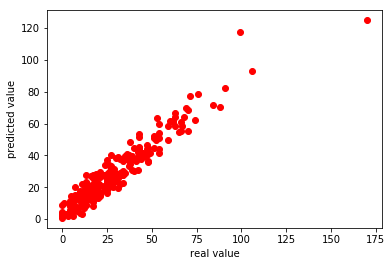

In [42]:
plt.plot(real.value, y_pre,'ro')
plt.xlabel("real value")
plt.ylabel("predicted value")
plt.show()